#Libs

In [1]:
!pip install -q yfinance
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 31.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 968 kB 14.7 MB/s 
     |████████████████████████████████| 138 kB 80.5 MB/s 
     |████████████████████████████████| 359 kB 85.2 MB/s 
     |████████████████████████████████| 3.6 MB 80.5 MB/s 
     |████████████████████████████████| 55 kB 4.7 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's depen

In [2]:
import requests
import pandas as pd
from time import sleep
import yfinance as yf
from bs4 import BeautifulSoup
from selenium import webdriver
import json
import sys

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: use options instead of chrome_options
  from ipykernel import kernelapp as app


#Getting S&P 500 assets list

##Getting S&P 500 assets list from Business Insider

In [9]:
for i in range(1,12):
	url = 'https://markets.businessinsider.com/index/s&p_500?p={}'.format(i)
	#sleep(5)
	html = requests.get(url).content
	df_list = pd.read_html(html)
	if i == 1:
		df = df_list[0]
		df['pagina'] = '{}'.format(i)
	else:
		df_i = df_list[0]
		df_i['pagina'] = '{}'.format(i)
		df = pd.concat([df,df_i])
sp500_bi = df.copy()

In [10]:
sp500_bi

,Name,Previous Close,Last,%,+/-,Trade Time,pagina
0,3M,140.93,140.93,-2.09%,-3.01,3/11/2022,1
1,A.O. Smith,65.72,65.72,-1.40%,-0.93,3/11/2022,1
2,Abbott Laboratories,114.05,114.05,-2.55%,-2.98,3/11/2022,1
3,AbbVie,149.09,149.09,-0.05%,-0.08,3/11/2022,1
4,ABIOMED,286.79,286.79,-6.16%,-18.83,3/11/2022,1
...,...,...,...,...,...,...,...
0,YUM! Brands,116.26,116.26,0.37%,0.43,3/11/2022,11
1,Zebra Technologies,386.07,386.07,-0.70%,-2.72,3/11/2022,11
2,Zimmer Biomet,118.83,118.83,-0.44%,-0.53,3/11/2022,11
3,Zions Bancorporation,64.21,64.21,-0.48%,-0.31,3/11/2022,11


##Getting S&P 500 assets list from Financial Times

In [11]:
url = 'https://markets.ft.com/data/indices/tearsheet/constituents?s=INX:IOM'
#sleep(5)
html = requests.get(url).content
df_list = pd.read_html(html)
sp500_ft = df_list[0]

In [12]:
sp500_ft

,Equities,Last Price,Today's % value change,1 year % value change
0,3M CoMMM:NYQ,140.96 USD,-2.06%,-23.77%
1,A O Smith CorpAOS:NYQ,65.72 USD,-1.34%,+2.08%
2,Abbott LaboratoriesABT:NYQ,114.02 USD,-2.55%,-2.30%
3,Abbvie IncABBV:NYQ,149.06 USD,-0.07%,+37.74%
4,ABIOMED IncABMD:NSQ,286.79 USD,-6.16%,-5.52%
5,Accenture PLCACN:NYQ,311.58 USD,+0.67%,+17.60%
6,Activision Blizzard IncATVI:NSQ,80.31 USD,-0.61%,-13.68%
7,Adobe IncADBE:NSQ,416.38 USD,-5.14%,-6.28%
8,Advance Auto Parts IncAAP:NYQ,204.08 USD,-0.41%,+13.64%
9,Advanced Micro Devices IncAMD:NSQ,104.29 USD,-2.04%,+28.67%


##Getting S&P 500 assets list from SlickCharts.com

In [13]:
# Grab content from URL (Pegar conteúdo HTML a partir da URL)
url = "https://www.slickcharts.com/sp500"

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.get(url)
driver.implicitly_wait(10)  # in seconds

element = driver.find_element_by_xpath(
        "/html/body/div[2]/div[3]/div[1]/div/div/table")
        
html_content = element.get_attribute('outerHTML')

# Parse HTML (Parsear o conteúdo HTML) - BeaultifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find(name='table')

# Data Structure Conversion (Estruturar conteúdo em um Data Frame) - Pandas
sp500_slickcharts = pd.read_html(str(table))[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if __name__ == '__main__':


In [74]:
sp500_slickcharts

,#,Company,Symbol,Weight,Price,Chg,% Chg
0,1,Apple Inc.,AAPL,6.845445,154.44,-4.08,(-2.57%)
1,2,Microsoft Corporation,MSFT,5.942231,279.80,-5.79,(-2.03%)
2,3,Amazon.com Inc.,AMZN,3.549133,2910.00,-26.35,(-0.90%)
3,4,Alphabet Inc. Class A,GOOGL,2.207978,2596.00,-52.59,(-1.99%)
4,5,Alphabet Inc. Class C,GOOG,2.056277,2608.00,-45.64,(-1.72%)
...,...,...,...,...,...,...,...
500,501,Discovery Inc. Class A,DISCA,0.011322,23.78,-1.30,(-5.18%)
501,502,IPG Photonics Corporation,IPGP,0.011269,110.00,-2.50,(-2.22%)
502,503,Under Armour Inc. Class A,UAA,0.008058,15.37,0.08,(0.52%)
503,504,Under Armour Inc. Class C,UA,0.007554,14.00,0.17,(1.23%)


##Getting S&P 500 assets list from Stock Market MBA

In [14]:
# Grab content from URL (Pegar conteúdo HTML a partir da URL)
url = "https://stockmarketmba.com/stocksinthesp500.php"

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.get(url)
driver.implicitly_wait(10)  # in seconds

element = driver.find_element_by_xpath(
        '''//*[@id="ipos"]''')
        
html_content = element.get_attribute('outerHTML')

# Parse HTML (Parsear o conteúdo HTML) - BeaultifulSoup
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find(name='table')

# Data Structure Conversion (Estruturar conteúdo em um Data Frame) - Pandas
sp500_stockmarketmba = pd.read_html(str(table))[0]
sp500_stockmarketmba = sp500_stockmarketmba[:len(sp500_stockmarketmba)-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  if __name__ == '__main__':


In [75]:
sp500_stockmarketmba

,Symbol,Description,Category2,Category3,GICS Sector,Price to book value
0,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,35.96
1,MSFT,Microsoft Corp,Common stocks,Large cap,Information Technology,13.38
2,GOOG,Alphabet Inc Class C,Common stocks,Large cap,Communication Services,3.33
3,GOOGL,Alphabet Inc Class A,Common stocks,Large cap,Communication Services,3.17
4,AMZN,Amazon.Com Inc.,Common stocks,Large cap,Consumer Discretionary,10.81
...,...,...,...,...,...,...
500,NLSN,Nielsen Holdings Plc,Common stocks,Mid cap,Industrials,1.86
501,ALK,Alaska Air Group Inc,Common stocks,Mid cap,Industrials,1.63
502,IPGP,IPG Photonics Corp,Common stocks,Mid cap,Information Technology,2.17
503,PVH,PVH Corp,Common stocks,Mid cap,Consumer Discretionary,1.00


##Checando as bases (Slick Charts vs Stock Market MBA)

In [15]:
len(pd.merge(sp500_slickcharts,sp500_stockmarketmba,how='inner',on='Symbol'))-len(sp500_slickcharts)

0

#Getting financial statements and performance indicators

##Setting Parameters

In [16]:
stock_list = sp500_slickcharts['Symbol']
print('len stock list', len(stock_list))
stock_historical = yf.download(stock_list[0], start = '2016-01-01', end = '2021-12-31')['Adj Close'].head(0)
stock_data = yf.Ticker(stock_list[0]) 
stock_financials = pd.merge(stock_data.quarterly_financials.reset_index(),stock_data.financials.reset_index(),how='left',on='index').head(0)
stock_balancesheet = pd.merge(stock_data.balance_sheet.reset_index(),stock_data.quarterly_balance_sheet.reset_index(),how='left',on='index').head(0)
stock_analysis = stock_data.analysis.copy().head(0)

asset_issue = []

len stock list 505
[*********************100%***********************]  1 of 1 completed


##Financials

In [ ]:
# Getting the financials from assets
i=0
for asset in stock_list:
  i+=1
  print(i)

  asset_i = pd.DataFrame(yf.download(asset, start = '2016-01-01', end = '2021-12-31')['Adj Close'])
  asset_i['Stock'] = asset
  stock_historical = pd.concat([stock_historical,asset_i])

  if len(asset_i)>0:
    stock_data = yf.Ticker(asset) 
    if len(stock_data.quarterly_financials)>0 and len(stock_data.financials)>0:
      stock_financials_i = pd.merge(stock_data.quarterly_financials.reset_index(),stock_data.financials.reset_index(),how='left',on='index')
      stock_financials_i['stock'] = asset

      stock_financials = pd.concat([stock_financials,stock_financials_i])

stock_financials.to_csv('stock_financials.csv')
stock_financials.to_excel('stock_financials.xlsx')

In [ ]:
stock_financials_i

,index,2021-12-25 00:00:00,2021-09-25 00:00:00_x,2021-06-26 00:00:00,2021-03-27 00:00:00,2021-09-25 00:00:00_y,2020-09-26 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,stock
0,Research Development,6306000000.0,5772000000.0,5717000000.0,5262000000.0,21914000000.0,18752000000.0,16217000000.0,14236000000.0,AAPL
1,Effect Of Accounting Charges,None,None,None,None,None,None,None,None,AAPL
2,Income Before Tax,41241000000.0,23248000000.0,24369000000.0,28011000000.0,109207000000.0,67091000000.0,65737000000.0,72903000000.0,AAPL
3,Minority Interest,None,None,None,None,None,None,None,None,AAPL
4,Net Income,34630000000.0,20551000000.0,21744000000.0,23630000000.0,94680000000.0,57411000000.0,55256000000.0,59531000000.0,AAPL
5,Selling General Administrative,6449000000.0,5616000000.0,5412000000.0,5314000000.0,21973000000.0,19916000000.0,18245000000.0,16705000000.0,AAPL
6,Gross Profit,54243000000.0,35174000000.0,35255000000.0,38079000000.0,152836000000.0,104956000000.0,98392000000.0,101839000000.0,AAPL
7,Ebit,41488000000.0,23786000000.0,24126000000.0,27503000000.0,108949000000.0,66288000000.0,63930000000.0,70898000000.0,AAPL
8,Operating Income,41488000000.0,23786000000.0,24126000000.0,27503000000.0,108949000000.0,66288000000.0,63930000000.0,70898000000.0,AAPL
9,Other Operating Expenses,None,None,None,None,None,None,None,None,AAPL


##Balance Sheets

In [ ]:
# Getting the balance sheet from assets
i=0
for asset in stock_list:
  i+=1
  print(i)

  asset_i = pd.DataFrame(yf.download(asset, start = '2016-01-01', end = '2021-12-31')['Adj Close'])
  asset_i['Stock'] = asset
  stock_historical = pd.concat([stock_historical,asset_i])

  if len(asset_i)>0:
    stock_data = yf.Ticker(asset) 

    if len(stock_data.balance_sheet)>0 and len(stock_data.quarterly_balance_sheet)>0:
      stock_balancesheet_i = pd.merge(stock_data.balance_sheet.reset_index(),stock_data.quarterly_balance_sheet.reset_index(),how='left',on='index')
      stock_balancesheet_i['stock'] = asset
      stock_balancesheet = pd.concat([stock_balancesheet,stock_balancesheet_i])

stock_balancesheet.to_csv('stock_balancesheet.csv')
stock_balancesheet.to_excel('stock_balancesheet.xlsx')

In [76]:
stock_balancesheet

,DRE,2021-09,2020-09,2019-09,2018-09,2021-09,2021-06,2021-03,2020-12,2021-12,...,2021-12,2021-08,2020-08,2019-07,2018-07,2021-08,2020-11,2018-02,2021-03,2021-03
0,Total Liab,2.879120e+11,2.585490e+11,2.480280e+11,2.585780e+11,2.879120e+11,2.655600e+11,2.679800e+11,NaN,3.092590e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total Stockholder Equity,6.309000e+10,6.533900e+10,9.048800e+10,1.071470e+11,6.309000e+10,6.428000e+10,6.917800e+10,NaN,7.193200e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Other Current Liab,5.357700e+10,4.786700e+10,4.324200e+10,3.929300e+10,5.357700e+10,5.130600e+10,5.325500e+10,NaN,5.704300e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total Assets,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11,3.510020e+11,3.298400e+11,3.371580e+11,NaN,3.811910e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Common Stock,5.736500e+10,5.077900e+10,4.517400e+10,4.020100e+10,5.736500e+10,5.498900e+10,5.420300e+10,NaN,5.842400e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12874,Net Tangible Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12875,Net Receivables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12876,Long Term Debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12877,Inventory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Performance Indicators

In [ ]:
#Getting assets performance indicators
i=0
for asset in stock_list:
  i+=1
  print(i)

  asset_i = pd.DataFrame(yf.download(asset, start = '2016-01-01', end = '2021-12-31')['Adj Close'])
  asset_i['Stock'] = asset
  stock_historical = pd.concat([stock_historical,asset_i])

  if len(asset_i)>0:
    stock_data = yf.Ticker(asset) 

    if asset not in ('SBUX','V','T','C','F','D','A','O','J','K','L','WTW','PARA','AMP','SYF','APA'):
                 
      stock_analysis_i = stock_data.analysis.copy()
      stock_analysis_i['stock'] = asset
      stock_analysis = pd.concat([stock_analysis,stock_analysis_i])

  else:
    asset_issue.append(asset)
    print('issues: ',len(asset_issue))

In [ ]:
#Run this code cell if the previous code cell encounters a problem (an asset that has no performance indicators on Yahoo Finance)

for asset in stock_list[i:]:
  i+=1
  print(i)

  asset_i = pd.DataFrame(yf.download(asset, start = '2016-01-01', end = '2021-12-31')['Adj Close'])
  asset_i['Stock'] = asset
  stock_historical = pd.concat([stock_historical,asset_i])

  if len(asset_i)>0:
    stock_data = yf.Ticker(asset) 

    if asset not in ('SBUX','V','T','C','F','D','A','O','J','K','L','WTW','PARA','AMP','SYF','APA'):
                 
      stock_analysis_i = stock_data.analysis.copy()
      stock_analysis_i['stock'] = asset
      stock_analysis = pd.concat([stock_analysis,stock_analysis_i])

  else:
    asset_issue.append(asset)
    print('issues: ',len(asset_issue))

stock_analysis.to_csv('stock_analysis.csv')
stock_analysis.to_excel('stock_analysis.xlsx')

In [77]:
stock_analysis

,Max Age,End Date,Growth,Earnings Estimate Avg,Earnings Estimate Low,Earnings Estimate High,Earnings Estimate Year Ago Eps,Earnings Estimate Number Of Analysts,Earnings Estimate Growth,Revenue Estimate Avg,...,Revenue Estimate Growth,Eps Trend Current,Eps Trend 7Days Ago,Eps Trend 30Days Ago,Eps Trend 60Days Ago,Eps Trend 90Days Ago,Eps Revisions Up Last7Days,Eps Revisions Up Last30Days,Eps Revisions Down Last30Days,Eps Revisions Down Last90Days
Period,,,,,,,,,,,,,,,,,,,,,


##Historical price

In [ ]:
#Getting asset historical price
i=0
for asset in stock_list:
  i+=1
  print(i)
  stock_historical_i = pd.DataFrame(yf.download(asset, start = '2018-01-01', end = '2022-02-28')['Adj Close'])
  stock_historical_i['stock'] = asset                                  
  stock_historical = pd.concat([stock_historical,stock_historical_i])

#stock_historical.to_excel('stock_historical.xlsx')
stock_historical.to_csv('stock_historical.csv')

In [78]:
stock_historical.loc[(stock_historical['stock'] == 'AAPL')]

,Adj Close,stock
Date,,
2018-01-02,41.135754,AAPL
2018-01-03,41.128597,AAPL
2018-01-04,41.319633,AAPL
2018-01-05,41.790070,AAPL
2018-01-08,41.634853,AAPL
...,...,...
2022-02-18,167.300003,AAPL
2022-02-22,164.320007,AAPL
2022-02-23,160.070007,AAPL


#Transforming the data

In [65]:
stock_indicators = pd.read_csv('/content/stock_analysis.csv')
stock_financials = pd.read_csv('/content/stock_financials.csv')
stock_balancesheet = pd.read_csv('/content/stock_balancesheet.csv')
stock_price = pd.read_csv('/content/stock_historical.csv')

##Historical price

In [58]:
stock_historical = pd.read_csv('/content/stock_historical.csv')

In [60]:
stock_historical.drop('0',axis='columns',inplace=True)

In [61]:
stock_historical.set_index('Date',inplace=True)

In [62]:
stock_historical_df = stock_historical.groupby(['Date','stock']).sum().reset_index().pivot(index='Date',columns='stock', values='Adj Close')

Método de normalização utilizado

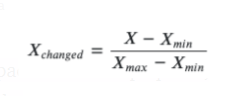

In [63]:
for column in stock_historical_df.columns:
  stock_historical_df[column] = (stock_historical_df[column]-min(stock_historical_df[column].dropna()))/(max(stock_historical_df[column].dropna())-min(stock_historical_df[column].dropna()))

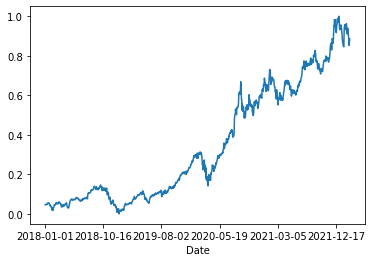

In [64]:
stock_historical_df['AAPL'].plot()

##Financials

In [69]:
columns = stock_financials.drop(['index','stock'],axis='columns').columns
i=0
for column in columns:
  i+=1
  stock_financials.rename(columns={column:columns[i-1][0:7]},inplace=True)

In [70]:
stock_financials.drop('Unnamed',axis='columns',inplace=True)

In [71]:
stock_financials.rename(columns={'index':'DRE'},inplace=True)
'''
stock_list = stock_financials['stock'].drop_duplicates()
columns = ['DRE', '2021-12', '2021-09', '2021-06', '2021-03', '2020-09', '2019-09',
       '2018-09', 'stock', '2020-06', '2019-06', '2018-06', '2020-12',
       '2019-12', '2018-12', '2017-12', '2021-10', '2021-08', '2021-05',
       '2021-01', '2020-01', '2019-01', '2018-01', '2022-01', '2021-07',
       '2021-04', '2020-02', '2019-02', '2020-10', '2020-11', '2019-11',
       '2018-11', '2020-07', '2019-07', '2018-07', '2021-11', '2021-02',
       '2020-08', '2019-08', '2018-08', '2020-05', '2019-05', '2018-05',
       '2018-02', '2020-04', '2019-04', '2018-04', '2019-10', '2018-10',
       '2020-03', '2019-03', '2018-03', '2017-11']
stock_financials_df = stock_financials[columns].head(0)
i=0
for asset in stock_list:
  i+=1
  print(i)
  stock_financials_df_i = stock_financials.loc[stock_financials['stock'] == asset].dropna(axis='columns',how='all')
  stock_financials_df_i.columns =['Name', 'Code', 'Age', 'Weight']
  stock_financials_df = pd.concat([stock_financials_df,stock_financials_df_i])'''

"\nstock_list = stock_financials['stock'].drop_duplicates()\ncolumns = ['DRE', '2021-12', '2021-09', '2021-06', '2021-03', '2020-09', '2019-09',\n       '2018-09', 'stock', '2020-06', '2019-06', '2018-06', '2020-12',\n       '2019-12', '2018-12', '2017-12', '2021-10', '2021-08', '2021-05',\n       '2021-01', '2020-01', '2019-01', '2018-01', '2022-01', '2021-07',\n       '2021-04', '2020-02', '2019-02', '2020-10', '2020-11', '2019-11',\n       '2018-11', '2020-07', '2019-07', '2018-07', '2021-11', '2021-02',\n       '2020-08', '2019-08', '2018-08', '2020-05', '2019-05', '2018-05',\n       '2018-02', '2020-04', '2019-04', '2018-04', '2019-10', '2018-10',\n       '2020-03', '2019-03', '2018-03', '2017-11']\nstock_financials_df = stock_financials[columns].head(0)\ni=0\nfor asset in stock_list:\n  i+=1\n  print(i)\n  stock_financials_df_i = stock_financials.loc[stock_financials['stock'] == asset].dropna(axis='columns',how='all')\n  stock_financials_df_i.columns =['Name', 'Code', 'Age', 'Wei

In [72]:
var = stock_financials.drop(['DRE','stock'],axis='columns').columns
stock_financials['']
stock_financials_df=pd.melt(stock_financials, id_vars=['DRE','stock'],value_vars=vars,var_name='dt ref',value_name='Result')
#stock_financials_df.to_csv('stock_financials_df.csv')

In [79]:
stock_financials

,DRE,2021-12,2021-09,2021-06,2021-03,2021-09,2020-09,2019-09,2018-09,stock,...,2021-12,2021-08,2021-08,2020-08,2019-07,2018-07,2020-11,2018-02,2021-03,2021-03
0,Research Development,6.306000e+09,5.772000e+09,5.717000e+09,5.262000e+09,2.191400e+10,1.875200e+10,1.621700e+10,1.423600e+10,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Effect Of Accounting Charges,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Income Before Tax,4.124100e+10,2.324800e+10,2.436900e+10,2.801100e+10,1.092070e+11,6.709100e+10,6.573700e+10,7.290300e+10,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Minority Interest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Net Income,3.463000e+10,2.055100e+10,2.174400e+10,2.363000e+10,9.468000e+10,5.741100e+10,5.525600e+10,5.953100e+10,AAPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,Cost Of Revenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10908,Total Other Income Expense Net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10909,Discontinued Operations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10910,Net Income From Continuing Ops,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
stock_financials_df

,DRE,stock,dt ref,Result
0,Research Development,AAPL,2021-03,NaN
1,Effect Of Accounting Charges,AAPL,2021-03,NaN
2,Income Before Tax,AAPL,2021-03,NaN
3,Minority Interest,AAPL,2021-03,NaN
4,Net Income,AAPL,2021-03,NaN
...,...,...,...,...
10907,Cost Of Revenue,NWS,2021-03,NaN
10908,Total Other Income Expense Net,NWS,2021-03,NaN
10909,Discontinued Operations,NWS,2021-03,NaN
10910,Net Income From Continuing Ops,NWS,2021-03,NaN


##Balance Sheet

In [66]:
stock_balancesheet

,Unnamed: 0,index,2021-09-25 00:00:00_x,2020-09-26 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,2021-09-25 00:00:00_y,2021-06-26 00:00:00,2021-03-27 00:00:00,2020-12-26 00:00:00,...,2021-12-26 00:00:00_y,2021-08-01 00:00:00_x,2020-08-02 00:00:00,2019-07-28 00:00:00,2018-07-29 00:00:00,2021-08-01 00:00:00_y,2020-11-29 00:00:00,2018-02-04 00:00:00,2021-03-27 00:00:00_x,2021-03-27 00:00:00_y
0,0,Total Liab,2.879120e+11,2.585490e+11,2.480280e+11,2.585780e+11,2.879120e+11,2.655600e+11,2.679800e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Total Stockholder Equity,6.309000e+10,6.533900e+10,9.048800e+10,1.071470e+11,6.309000e+10,6.428000e+10,6.917800e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Other Current Liab,5.357700e+10,4.786700e+10,4.324200e+10,3.929300e+10,5.357700e+10,5.130600e+10,5.325500e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Total Assets,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11,3.510020e+11,3.298400e+11,3.371580e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Common Stock,5.736500e+10,5.077900e+10,4.517400e+10,4.020100e+10,5.736500e+10,5.498900e+10,5.420300e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12874,22,Net Tangible Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12875,23,Net Receivables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12876,24,Long Term Debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12877,25,Inventory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
columns = stock_balancesheet.drop(['index','stock'],axis='columns').columns
i=0
for column in columns:
  i+=1
  stock_balancesheet.rename(columns={column:columns[i-1][0:7]},inplace=True)

stock_balancesheet.drop('Unnamed',axis='columns',inplace=True)

stock_balancesheet.rename(columns={'index':'DRE'},inplace=True)

var = stock_balancesheet.drop(['DRE','stock'],axis='columns').columns
stock_balancesheet_df=pd.melt(stock_balancesheet, id_vars=['DRE','stock'],value_vars=vars,var_name='dt ref',value_name='Result')
stock_balancesheet_df.to_csv('stock_balancesheet_df.csv')

In [68]:
stock_balancesheet_df

,DRE,stock,dt ref,Result
0,Total Liab,AAPL,2021-03,NaN
1,Total Stockholder Equity,AAPL,2021-03,NaN
2,Other Current Liab,AAPL,2021-03,NaN
3,Total Assets,AAPL,2021-03,NaN
4,Common Stock,AAPL,2021-03,NaN
...,...,...,...,...
12874,Net Tangible Assets,NWS,2021-03,NaN
12875,Net Receivables,NWS,2021-03,NaN
12876,Long Term Debt,NWS,2021-03,NaN
12877,Inventory,NWS,2021-03,NaN
